In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from matplotlib.ticker import ScalarFormatter

class OOMFormatter(ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [3]:
from utils.fileUtils.sr import NMSSM_MX_700_MY_400_studies

In [4]:
tree = Tree(NMSSM_MX_700_MY_400_studies, exploration=True)
# tree1 = Tree(NMSSM_MX_450_MY_300_studies, exploration=True)

In [5]:
NMSSM_MX_700_MY_400_studies

'/eos/uscms/store/user/srosenzw/studies/NMSSM_nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'

In [6]:
tree.nevents

99000

NameError: name 'nsixb_lessthan6jets' is not defined

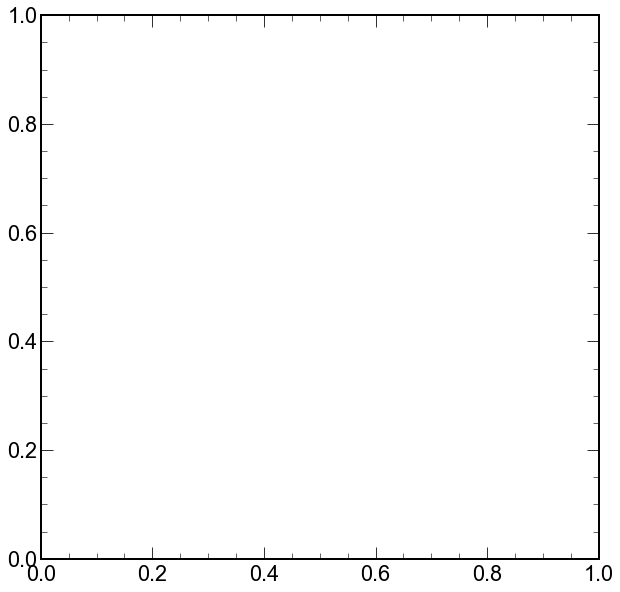

In [8]:
# jet_sortedbtag = 

fig, ax = plt.subplots()
n,e = Hist(nsixb_lessthan6jets, bins=np.arange(8), ax=ax)


fig, ax = plt.subplots()
n,ex,ey,im = Hist2d(tree.jet_signalId[:,:6], nsixb_lessthan6jets, bins=(np.arange(8),np.arange(8)), ax=ax)
fig.colorbar(im, ax=ax)
ax.set_xlabel('N jets')
ax.set_ylabel('N 6b')

Text(1, 0, 'N jets')

Text(0, 1, 'N 6b')

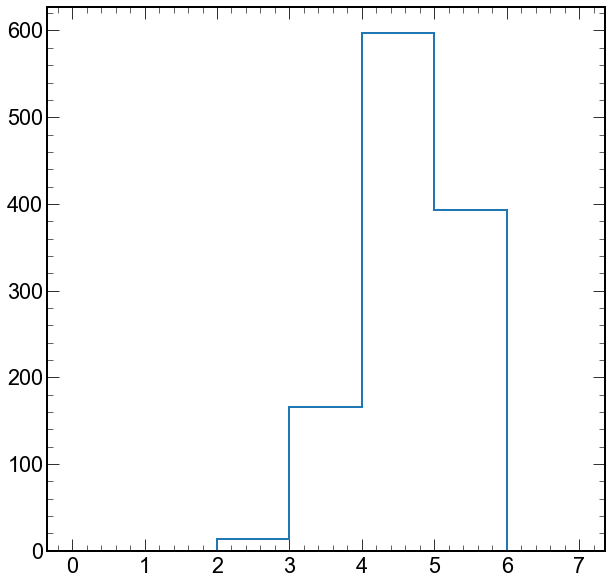

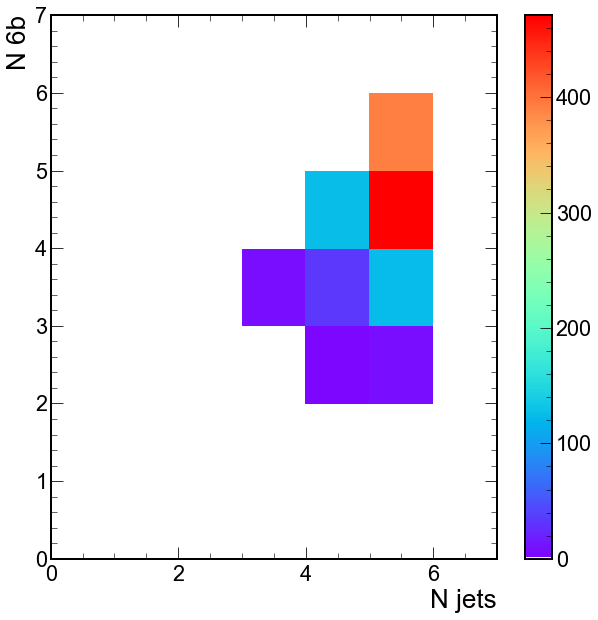

In [9]:
nsixb_lessthan6jets = ak.sum(tree.jet_signalId[ak.count(ak.sort(tree.jet_pt, axis=1)[:,::-1][:,:6], axis=1) != 6] != -1, axis=1)
njets_lessthan6jets = ak.count(ak.sort(tree.jet_pt, axis=1)[:,::-1][:,:6], axis=1)
njets_lessthan6jets = njets_lessthan6jets[njets_lessthan6jets != 6]

fig, ax = plt.subplots()
n,e = Hist(nsixb_lessthan6jets, bins=np.arange(8), ax=ax)


fig, ax = plt.subplots()
n,ex,ey,im = Hist2d(njets_lessthan6jets, nsixb_lessthan6jets, bins=(np.arange(8),np.arange(8)), ax=ax)
fig.colorbar(im, ax=ax)
ax.set_xlabel('N jets')
ax.set_ylabel('N 6b')

In [10]:
njets_lessthan6jets

<Array [5, 5, 5, 5, 5, 5, ... 5, 5, 5, 5, 5, 5] type='1170 * int64'>

In [11]:
nsixb_lessthan6jets

<Array [4, 3, 4, 4, 5, 5, ... 4, 4, 4, 5, 4, 3] type='1170 * int64'>

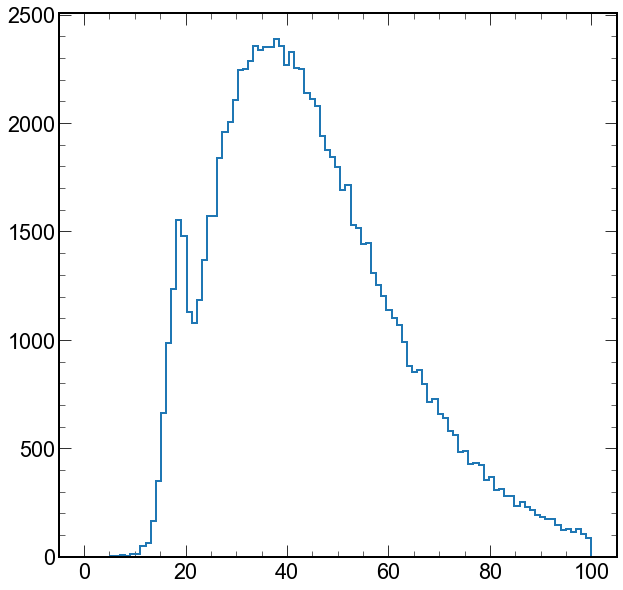

In [17]:
fig, ax = plt.subplots()

n,e = Hist(ak.min(ak.sort(tree.jet_pt, axis=1)[:,::-1][:,:6], axis=1), bins=np.linspace(0,100,100), ax=ax)

In [5]:
HX_pt = tree.gen_HX_pt
H1_pt = tree.gen_HY1_pt
H2_pt = tree.gen_HY2_pt

In [6]:
ptBins = np.linspace(0,400,100)

Text(1, 0, '$p_T$ [GeV]')

Text(0, 1, 'Fraction of Events')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


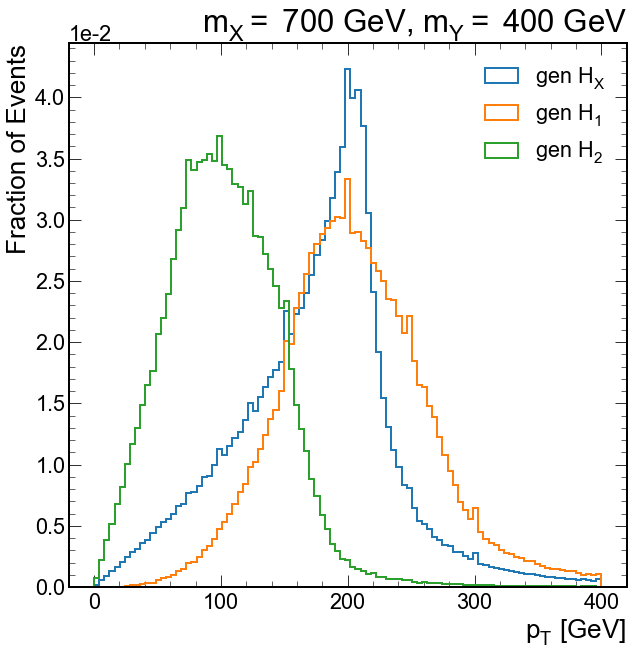

In [7]:
fig, ax = plt.subplots()

n,e = Hist(HX_pt, bins=ptBins, ax=ax, label=r'gen $H_X$', density=1)
n,e = Hist(H1_pt, bins=ptBins, ax=ax, label=r'gen $H_1$', density=1)
n,e = Hist(H2_pt, bins=ptBins, ax=ax, label=r'gen $H_2$', density=1)

ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(tree.sample, loc='right')

fig.savefig('gen_H_pt.pdf')

In [8]:
ptBins = np.linspace(0,300,100)

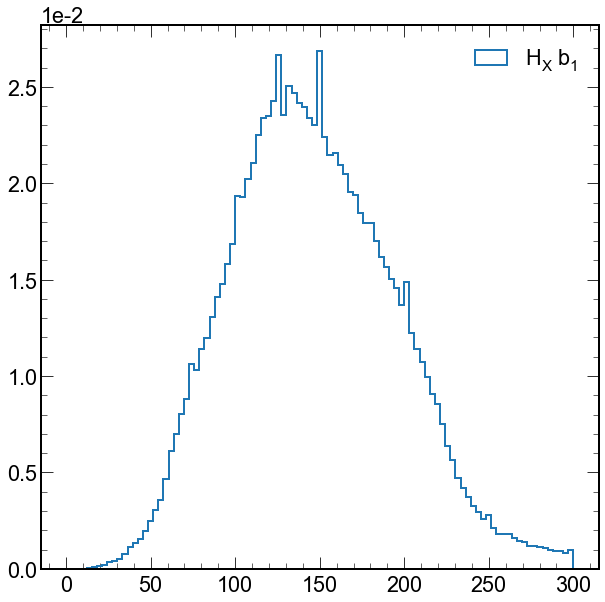

In [9]:
fig, ax = plt.subplots()

n,e = Hist(tree.gen_HX_b1_pt, bins=ptBins, ax=ax, label=r'$H_X \; b_1$', density=1)

Text(1, 0, '$p_T$ [GeV]')

Text(0, 1, 'Fraction of Events')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

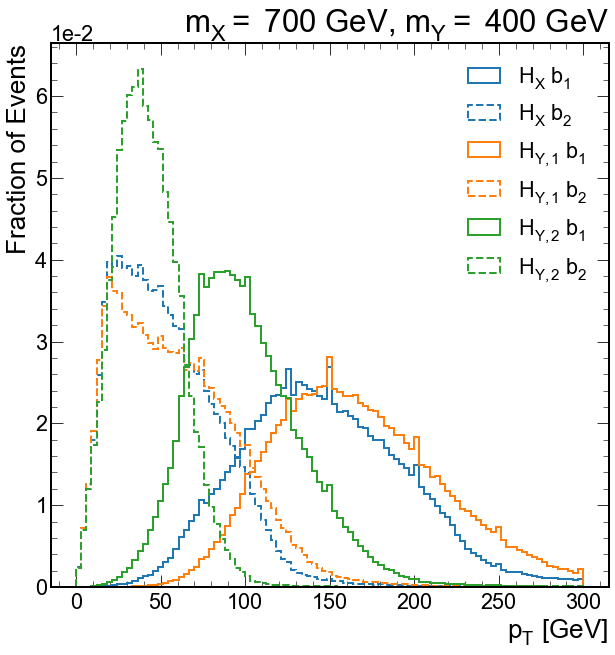

In [10]:
fig, ax = plt.subplots()

n,e = Hist(tree.gen_HX_b1_pt, bins=ptBins, ax=ax, label=r'$H_X \; b_1$', density=1)
n,e = Hist(tree.gen_HX_b2_pt, bins=ptBins, ax=ax, label=r'$H_X \; b_2$', density=1, color='C0', linestyle='--')
n,e = Hist(tree.gen_HY1_b1_pt, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_1$', density=1)
n,e = Hist(tree.gen_HY1_b2_pt, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_2$', density=1, color='C1', linestyle='--')
n,e = Hist(tree.gen_HY2_b1_pt, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_1$', density=1)
n,e = Hist(tree.gen_HY2_b2_pt, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_2$', density=1, color='C2', linestyle='--')
# n,e = Hist(H1_pt, bins=ptBins, ax=ax, label=r'$H_1$', density=1)
# n,e = Hist(H2_pt, bins=ptBins, ax=ax, label=r'$H_2$', density=1)

ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(tree.sample, loc='right')

fig.savefig('gen_b_pt.pdf')

In [11]:
sixb_eta = np.column_stack((
    tree.gen_HX_b1_recojet_eta.to_numpy(),
    tree.gen_HX_b2_recojet_eta.to_numpy(),
    tree.gen_HY1_b1_recojet_eta.to_numpy(),
    tree.gen_HY1_b2_recojet_eta.to_numpy(),
    tree.gen_HY2_b1_recojet_eta.to_numpy(),
    tree.gen_HY2_b2_recojet_eta.to_numpy()
    ))

In [12]:
sixb_pt = np.column_stack((
    tree.gen_HX_b1_recojet_ptRegressed.to_numpy(),
    tree.gen_HX_b2_recojet_ptRegressed.to_numpy(),
    tree.gen_HY1_b1_recojet_ptRegressed.to_numpy(),
    tree.gen_HY1_b2_recojet_ptRegressed.to_numpy(),
    tree.gen_HY2_b1_recojet_ptRegressed.to_numpy(),
    tree.gen_HY2_b2_recojet_ptRegressed.to_numpy()
    ))

In [13]:
minEta = []
maxEta = []
minPt = []

for eta, pt in zip(sixb_eta, sixb_pt):
    # max_ind = pt.argmax()
    # min_ind = abs(pt).argmin()
    
    min_ind = abs(eta).argmin()
    max_ind = abs(np.where(eta == -999, 0, eta)).argmax()
    minEta.append(eta[min_ind])
    maxEta.append(eta[max_ind])
    minPt.append(ak.min(pt))

minEta = ak.Array(minEta)
maxEta = ak.Array(maxEta)
minPt = ak.Array(minPt)

In [14]:
ak.sum(abs(maxEta) > 2.5)/len(maxEta)

0.1243086265764574

In [15]:
ak.sum((abs(maxEta) > 2.5)&(minPt > 20))/ak.sum(minPt > 20)

0.13512850258789935

In [16]:
nsixb = ak.sum(tree.jet_signalId > -1, axis=1)

In [17]:
outside_tracker = abs(maxEta) > 2.5

In [18]:
etaBins = np.linspace(-4,4,80)

Text(1, 0, 'Reco Jet $\\eta$')

Text(0, 1, 'Fraction of Events')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

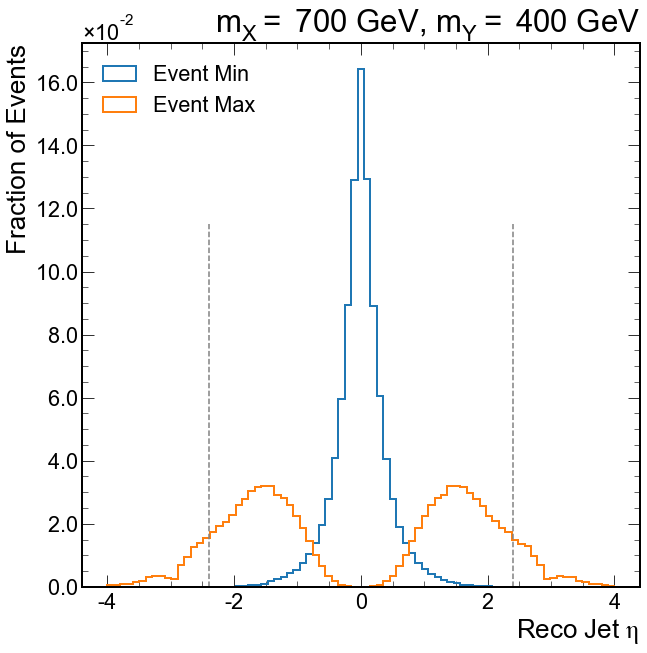

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

n, e = Hist(minEta, bins=etaBins, density=1, label='Event Min', ax=ax)#, linestyle=lsty)
nMax = n.max()
n, e = Hist(maxEta, bins=etaBins, density=1, label='Event Max', ax=ax)#, linestyle=lsty)
if n.max() > nMax: nMax = n.max()

ax.plot([+2.4,+2.4],[0, nMax*0.7],'--',color='grey')
ax.plot([-2.4,-2.4],[0, nMax*0.7],'--',color='grey')
# ax.legend(loc=2, fontsize=14)
ax.legend(loc=2)

ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.1f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax.set_xlabel(r"Reco Jet $\eta$")
ax.set_ylabel('Fraction of Events')

ax.set_title(tree.sample, loc='right')
# fig.suptitle(tree_700_400.sample)

# fig.savefig('distributions/eta_MinMax_700_400.pdf')
fig.savefig('eta_MinMax_700_400.pdf')

In [20]:
dPhi_HX = tree.gen_HX_b1_phi - tree.gen_HX_b2_phi
dPhi_HX = ak.where((dPhi_HX) > +np.pi, dPhi_HX - np.pi, dPhi_HX)
dPhi_HX = ak.where((dPhi_HX) < -np.pi, dPhi_HX + np.pi, dPhi_HX)

dPhi_HY1 = tree.gen_HY1_b1_phi - tree.gen_HY1_b2_phi
dPhi_HY1 = ak.where((dPhi_HY1) > +np.pi, dPhi_HY1 - np.pi, dPhi_HY1)
dPhi_HY1 = ak.where((dPhi_HY1) < -np.pi, dPhi_HY1 + np.pi, dPhi_HY1)

dPhi_HY2 = tree.gen_HY2_b1_phi - tree.gen_HY2_b2_phi
dPhi_HY2 = ak.where((dPhi_HY2) > +np.pi, dPhi_HY2 - np.pi, dPhi_HY2)
dPhi_HY2 = ak.where((dPhi_HY2) < -np.pi, dPhi_HY2 + np.pi, dPhi_HY2)

In [21]:
dR_HX = np.sqrt((tree.gen_HX_b1_eta - tree.gen_HX_b2_eta)**2 + (dPhi_HX)**2)
dR_HY1 = np.sqrt((tree.gen_HY1_b1_eta - tree.gen_HY1_b2_eta)**2 + (dPhi_HY1)**2)
dR_HY2 = np.sqrt((tree.gen_HY2_b1_eta - tree.gen_HY2_b2_eta)**2 + (dPhi_HY2)**2)

In [22]:
dRbins = np.linspace(0,5,100)

In [23]:
ak.sum((dR_HX < 0.8) | (dR_HY1 < 0.8) | (dR_HY1 < 0.8))/len(dR_HX)
ak.sum((dR_HX < 0.4) | (dR_HY1 < 0.4) | (dR_HY1 < 0.4))/len(dR_HX)

0.08399583391079025

0.011122870233880552

Text(1, 0, '$\\Delta R_{bb}$')

Text(0, 1, 'Fraction of Events')

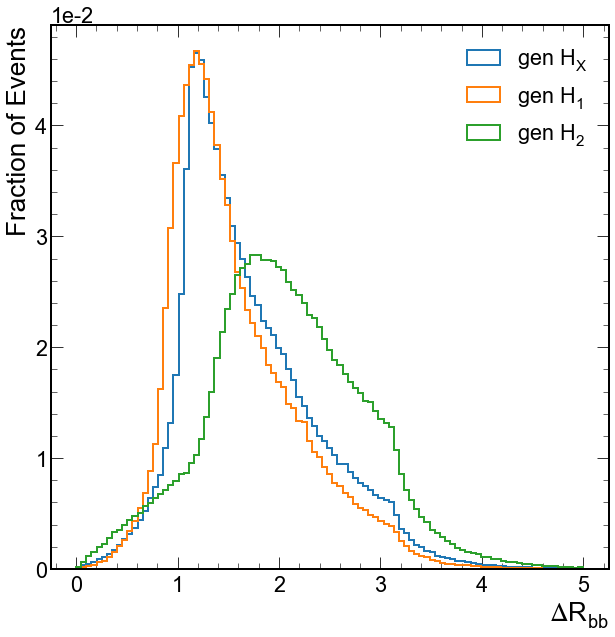

In [24]:
fig, ax = plt.subplots()

n,e = Hist(dR_HX, bins=dRbins, ax=ax,  label=r'gen $H_X$', density=1)
n,e = Hist(dR_HY1, bins=dRbins, ax=ax, label=r'gen $H_1$', density=1)
n,e = Hist(dR_HY2, bins=dRbins, ax=ax, label=r'gen $H_2$', density=1)

ax.set_xlabel(r'$\Delta R_{bb}$')
ax.set_ylabel('Fraction of Events')

# ax.set_title(tree.sample, loc='right')

fig.savefig('dR_3H.pdf')

DeltaR ~ 2m/pT

In [25]:
mH = 125 # GeV

dR_HX = 2 * mH / HX_pt
dR_H1 = 2 * mH / H1_pt
dR_H2 = 2 * mH / H2_pt

In [26]:
dRbins = np.linspace(0,7,100)

Text(1, 0, '$\\Delta R_{bb}$')

Text(0, 1, 'Fraction of Events')

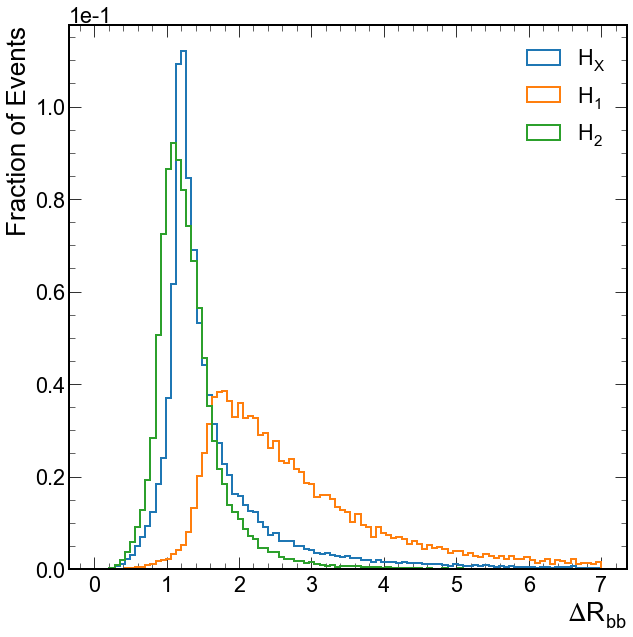

In [46]:
fig, ax = plt.subplots()

n,e = Hist(dR_HX, bins=dRbins, ax=ax, label=r'$H_X$', density=1)
n,e = Hist(dR_H1, bins=dRbins, ax=ax, label=r'$H_1$', density=1)
n,e = Hist(dR_H2, bins=dRbins, ax=ax, label=r'$H_2$', density=1)

ax.set_xlabel(r'$\Delta R_{bb}$')
ax.set_ylabel('Fraction of Events')

In [49]:
# HX_b1_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 0])
# HX_b2_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 1])
# H1_b1_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 2])
# H1_b2_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 3])
# H2_b1_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 4])
# H2_b2_pt = ak.flatten(tree.jet_pt[tree.jet_signalId == 5])

HX_b1_pt = tree.gen_HX_b1_recojet_ptRegressed
HX_b2_pt = tree.gen_HX_b2_recojet_ptRegressed
H1_b1_pt = tree.gen_HY1_b1_recojet_ptRegressed
H1_b2_pt = tree.gen_HY1_b2_recojet_ptRegressed
H2_b1_pt = tree.gen_HY2_b1_recojet_ptRegressed
H2_b2_pt = tree.gen_HY2_b2_recojet_ptRegressed

Text(1, 0, '$p_T$ [GeV]')

Text(0, 1, 'Fraction of Events')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

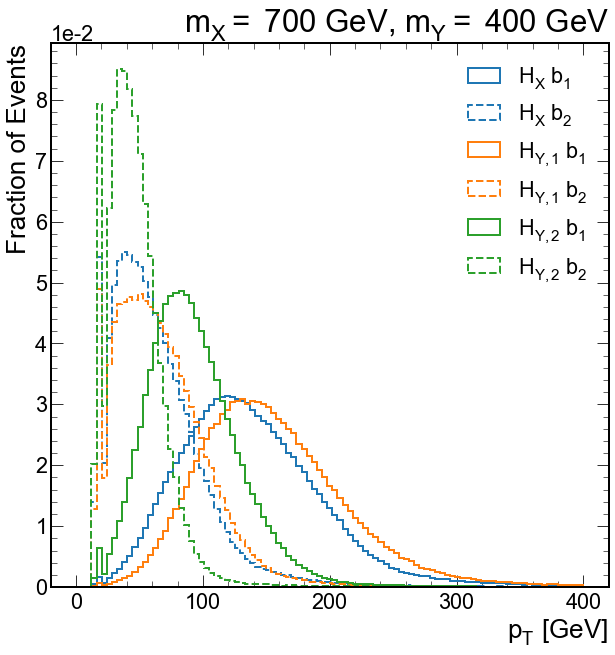

In [50]:
fig, ax = plt.subplots()

n,e = Hist(HX_b1_pt, bins=ptBins, ax=ax, label=r'$H_X \; b_1$', density=1)
n,e = Hist(HX_b2_pt, bins=ptBins, ax=ax, label=r'$H_X \; b_2$', density=1, color='C0', linestyle='--')
n,e = Hist(H1_b1_pt, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_1$', density=1)
n,e = Hist(H1_b2_pt, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_2$', density=1, color='C1', linestyle='--')
n,e = Hist(H2_b1_pt, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_1$', density=1)
n,e = Hist(H2_b2_pt, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_2$', density=1, color='C2', linestyle='--')
# n,e = Hist(H1_pt, bins=ptBins, ax=ax, label=r'$H_1$', density=1)
# n,e = Hist(H2_pt, bins=ptBins, ax=ax, label=r'$H_2$', density=1)

ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(tree.sample, loc='right')

fig.savefig('reco_b_pt.pdf')

In [58]:
HX_b1_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 0) & (tree.jet_pt > 20)])
HX_b2_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 1) & (tree.jet_pt > 20)])
H1_b1_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 2) & (tree.jet_pt > 20)])
H1_b2_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 3) & (tree.jet_pt > 20)])
H2_b1_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 4) & (tree.jet_pt > 20)])
H2_b2_pt_20 = ak.flatten(tree.jet_pt[(tree.jet_signalId == 5) & (tree.jet_pt > 20)])

In [60]:
ak.sum((tree.jet_signalId >= -1) & (tree.jet_pt > 20))/len(tree.jet_pt)

8.082007282256743

Text(1, 0, '$p_T$ [GeV]')

Text(0, 1, 'Fraction of Events')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

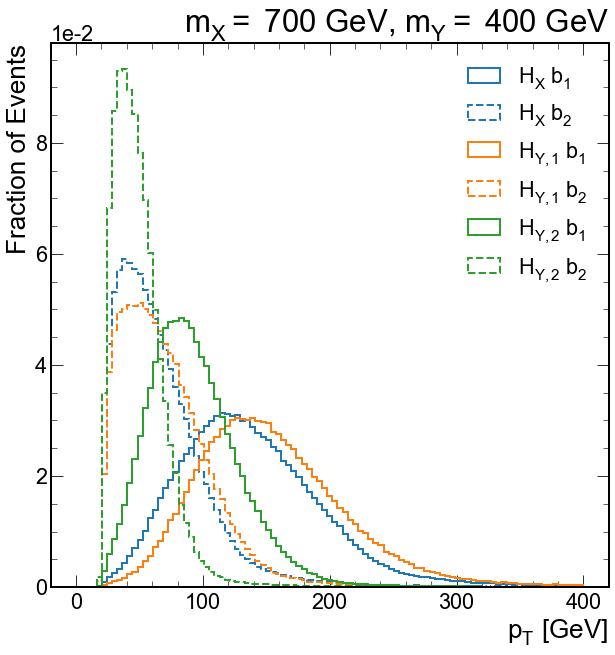

In [59]:
fig, ax = plt.subplots()

n,e = Hist(HX_b1_pt_20, bins=ptBins, ax=ax, label=r'$H_X \; b_1$', density=1)
n,e = Hist(HX_b2_pt_20, bins=ptBins, ax=ax, label=r'$H_X \; b_2$', density=1, color='C0', linestyle='--')
n,e = Hist(H1_b1_pt_20, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_1$', density=1)
n,e = Hist(H1_b2_pt_20, bins=ptBins, ax=ax, label=r'$H_{Y,1} \; b_2$', density=1, color='C1', linestyle='--')
n,e = Hist(H2_b1_pt_20, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_1$', density=1)
n,e = Hist(H2_b2_pt_20, bins=ptBins, ax=ax, label=r'$H_{Y,2} \; b_2$', density=1, color='C2', linestyle='--')
# n,e = Hist(H1_pt, bins=ptBins, ax=ax, label=r'$H_1$', density=1)
# n,e = Hist(H2_pt, bins=ptBins, ax=ax, label=r'$H_2$', density=1)

ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(tree.sample, loc='right')

fig.savefig('reco_b_pt_20.pdf')

In [42]:
nfound_sixb = ak.sum(tree.jet_signalId > -1, axis=1)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

Text(0, 1, 'Events')

Text(1, 0, '$n_\\mathrm{reco, sixb}$')

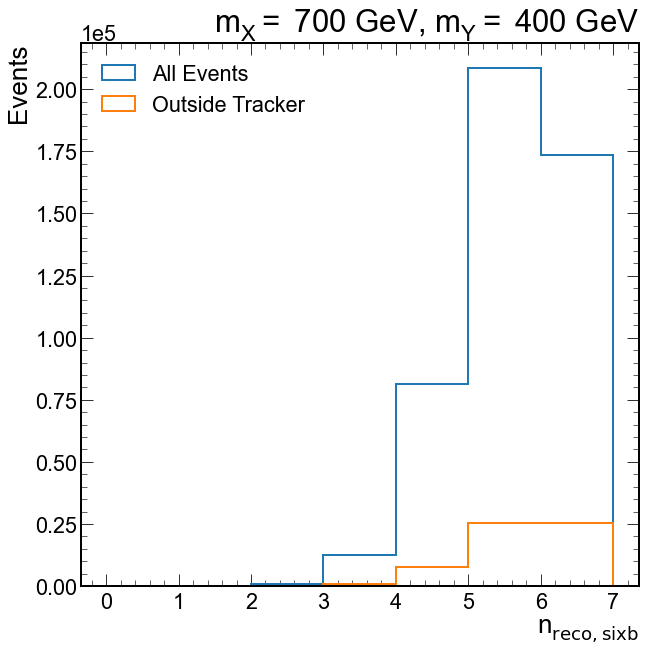

In [95]:
fig, ax = plt.subplots()

# ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.0f"))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

n,e = Hist(nfound_sixb, bins=np.arange(8), ax=ax, label='All Events')
n,e = Hist(nfound_sixb[outside_tracker], bins=np.arange(8), ax=ax, label='Outside Tracker')
# n,e = Hist(nsixb, bins=np.arange(8), ax=ax, density=1)

ax.legend(loc=2)

ax.set_title(tree.sample, loc='right')

ax.set_ylabel('Events')
ax.set_xlabel('$n_\mathrm{reco, sixb}$')

fig.savefig('nsixb_outside_tracker.pdf')

In [63]:
ak.sum(nfound_sixb == 6)/len(nfound_sixb)
ak.sum(nfound_sixb == 5)/len(nfound_sixb)

0.364087639062126

0.43751916107058414

In [41]:
n_num,e = np.histogram(tree.gen_HX_b1_eta[ak.any(tree.jet_signalId == 0, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HX_b1_eta.to_numpy(), bins=etaBins)

eff_HX_b1_eta = np.where(n_den != 0, n_num/n_den, 0)

n_num,e = np.histogram(tree.gen_HX_b2_eta[ak.any(tree.jet_signalId == 1, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HX_b2_eta.to_numpy(), bins=etaBins)

eff_HX_b2_eta = np.where(n_den != 0, n_num/n_den, 0)

n_num,e = np.histogram(tree.gen_HY1_b1_eta[ak.any(tree.jet_signalId == 2, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HY1_b1_eta.to_numpy(), bins=etaBins)

eff_HY1_b1_eta = np.where(n_den != 0, n_num/n_den, 0)

n_num,e = np.histogram(tree.gen_HY1_b2_eta[ak.any(tree.jet_signalId == 3, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HY1_b2_eta.to_numpy(), bins=etaBins)

eff_HY1_b2_eta = np.where(n_den != 0, n_num/n_den, 0)

n_num,e = np.histogram(tree.gen_HY2_b1_eta[ak.any(tree.jet_signalId == 4, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HY2_b1_eta.to_numpy(), bins=etaBins)

eff_HY2_b1_eta = np.where(n_den != 0, n_num/n_den, 0)

n_num,e = np.histogram(tree.gen_HY2_b2_eta[ak.any(tree.jet_signalId == 5, axis=1)].to_numpy(), bins=etaBins)
n_den,e = np.histogram(tree.gen_HY2_b2_eta.to_numpy(), bins=etaBins)

eff_HY2_b2_eta = np.where(n_den != 0, n_num/n_den, 0)

Text(1, 0, 'gen $H_X \\;b_1 \\;\\eta$')

Text(0, 1, 'Efficiency')

Text(1, 0, 'gen $H_X \\;b_2 \\;\\eta$')

Text(0, 1, 'Efficiency')

Text(1, 0, 'gen $H_{Y,1} \\;b_1 \\;\\eta$')

Text(0, 1, 'Efficiency')

Text(1, 0, 'gen $H_{Y,2} \\;b_1 \\;\\eta$')

Text(0, 1, 'Efficiency')

Text(1, 0, 'gen $H_{Y,2} \\;b_1 \\;\\eta$')

Text(0, 1, 'Efficiency')

Text(1, 0, 'gen $H_{Y,2} \\;b_2 \\;\\eta$')

Text(0, 1, 'Efficiency')

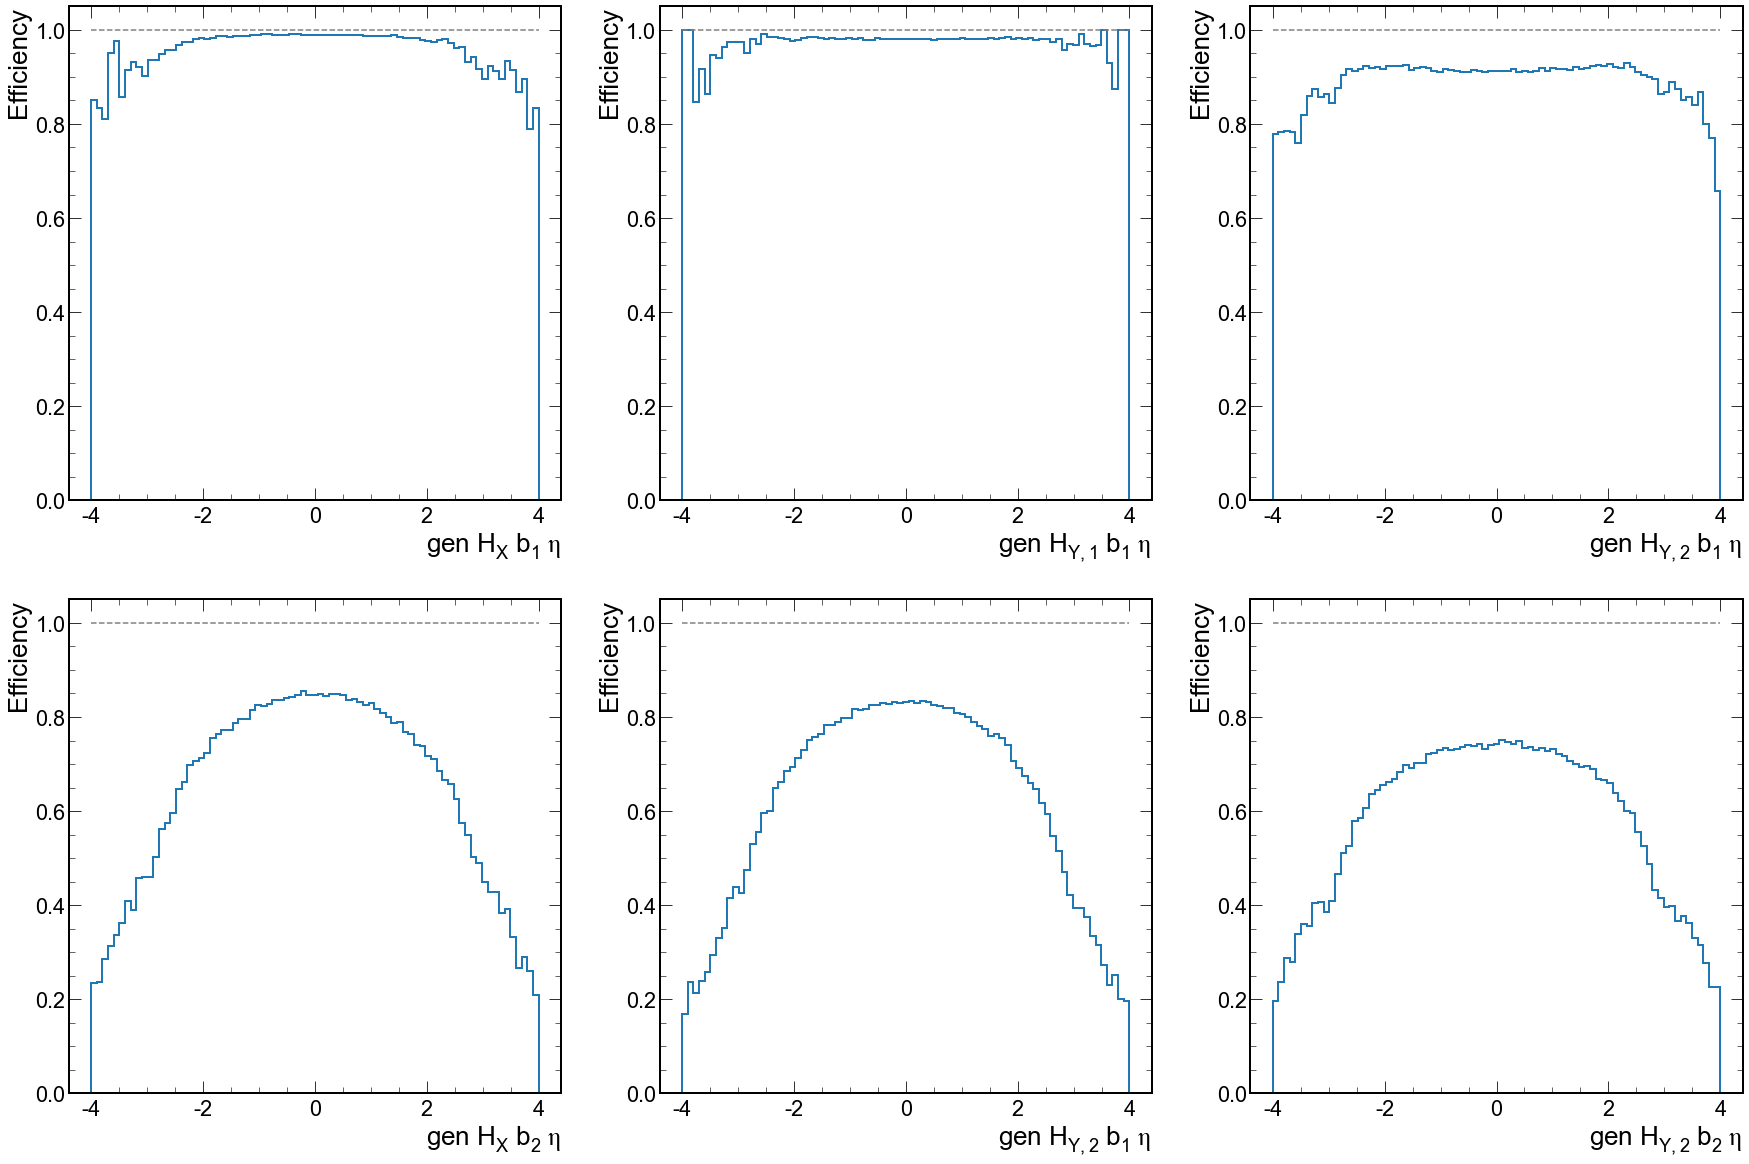

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,20))

ax = axs[0,0]
n,e = Hist(x_bins(etaBins), weights=eff_HX_b1_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
# ax.legend(loc=8)
ax.set_xlabel(r'gen $H_X \;b_1 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

ax = axs[1,0]
n,e = Hist(x_bins(etaBins), weights=eff_HX_b2_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
ax.set_xlabel(r'gen $H_X \;b_2 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

ax = axs[0,1]
n,e = Hist(x_bins(etaBins), weights=eff_HY1_b1_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
ax.set_xlabel(r'gen $H_{Y,1} \;b_1 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

ax = axs[1,1]
n,e = Hist(x_bins(etaBins), weights=eff_HY1_b2_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
ax.set_xlabel(r'gen $H_{Y,2} \;b_1 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

ax = axs[0,2]
n,e = Hist(x_bins(etaBins), weights=eff_HY2_b1_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
ax.set_xlabel(r'gen $H_{Y,2} \;b_1 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

ax = axs[1,2]
n,e = Hist(x_bins(etaBins), weights=eff_HY2_b2_eta, bins=etaBins, ax=ax)
ax.plot([-4,4],[1,1],c='gray',ls='--')
ax.set_xlabel(r'gen $H_{Y,2} \;b_2 \;\eta$', loc='right')
ax.set_ylabel('Efficiency')

fig.savefig('sixb_match_eff.pdf')

<Array [True, True, True, ... True, True, True] type='476226 * bool'>

In [ ]:
match_mask = ak.sum(tree.jet_signalId > -1, axis=1)

In [132]:
sixb_pt = tree.jet_pt[(tree.jet_signalId > -1) & (ak.sum(tree.jet_signalId > -1, axis=1) == 6)]

In [128]:
ak.count(sixb_pt, axis=1)

<Array [6, 0, 6, 6, 0, 6, ... 0, 6, 0, 0, 0, 6] type='476226 * int64'>

In [133]:
ak.sum(ak.min(sixb_pt, axis=1) > 20)/len(sixb_pt)

0.2832142722152927

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.3.0/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

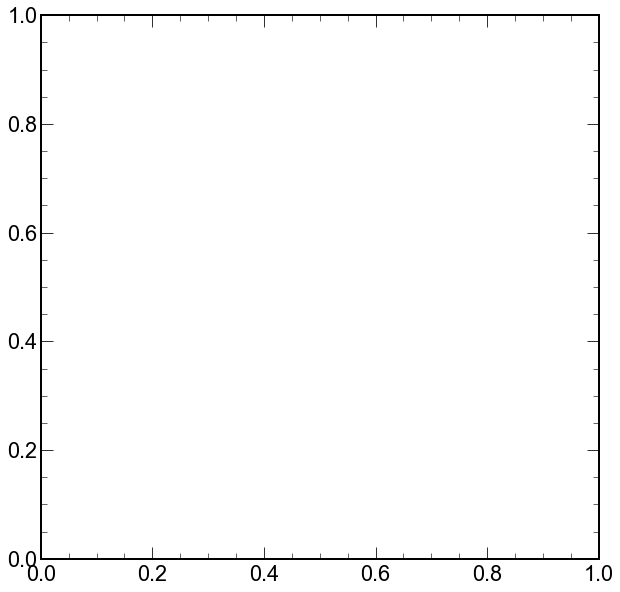

In [115]:
fig, ax = plt.subplots()

n,e = Hist(sixb_pt, bins=np.linspace(0,350,100), ax=ax)

In [62]:
ak.sum(ak.sum(tree.jet_pt > 30, axis=1) >= 6)/len(tree.jet_pt)

0.7712388655806277